In [1]:
# import the necessary dataset 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
# for dataframes and data related manuplation
import pandas as pd 
import numpy as np 
# for ploting the tree
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO 
from IPython.display import Image 
import pydotplus

### Context
This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. There are over half a million measurements total!

### Content
This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

### Acknowledgement
This dataset is part of the UCI Machine Learning Repository, and the original source can be found here. The original database owners are Jock A. Blackard, Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and GIS Program at Colorado State University.

### Inspiration
Can you build a model that predicts what types of trees grow in an area based on the surrounding characteristics? A past Kaggle competition project on this topic can be found [here](https://www.kaggle.com/c/forest-cover-type-prediction).
What kinds of trees are most common in the Roosevelt National Forest?
Which tree types can grow in more diverse environments? Are there certain tree types that are sensitive to an environmental factor, such as elevation or soil type?

In [2]:
# load the data 
colnames = ["elevation", "aspect", "slope", "horizontal_distance_to_hydrology", "vertical_distance_to_hydrology", "horizontal_distance_to_roadways", "hillshade_9am", "hillshade_noon", "hillshade_3pm", "horizontal_distance_to_fire_points", "wilderness_area1", "wilderness_area2", "wilderness_area3", "wilderness_area4", "soil_type1", "soil_type2", "soil_type3", "soil_type4", "soil_type5", "soil_type6", "soil_type7", "soil_type8", "soil_type9", "soil_type10", "soil_type11", "soil_type12", "soil_type13", "soil_type14", "soil_type15", "soil_type16", "soil_type17", "soil_type18", "soil_type19", "soil_type20", "soil_type21", "soil_type22", "soil_type23", "soil_type24", "soil_type25", "soil_type26", "soil_type27", "soil_type28", "soil_type29", "soil_type30", "soil_type31", "soil_type32", "soil_type33", "soil_type34", "soil_type35", "soil_type36", "soil_type37", "soil_type38", "soil_type39", "soil_type40", "cover_type"]
df_forest = pd.read_csv("./data/raw/forest_cover_type_dataset/covtype.csv", header=None, skiprows=1, names=colnames)
print("----*data types*----")
print(df_forest.dtypes)
print("----*describe the dataset*----")
print(df_forest.describe())
print("----*describe the dataset*----")
print(df_forest.shape)
df_forest.head()

----*data types*----
elevation                             int64
aspect                                int64
slope                                 int64
horizontal_distance_to_hydrology      int64
vertical_distance_to_hydrology        int64
horizontal_distance_to_roadways       int64
hillshade_9am                         int64
hillshade_noon                        int64
hillshade_3pm                         int64
horizontal_distance_to_fire_points    int64
wilderness_area1                      int64
wilderness_area2                      int64
wilderness_area3                      int64
wilderness_area4                      int64
soil_type1                            int64
soil_type2                            int64
soil_type3                            int64
soil_type4                            int64
soil_type5                            int64
soil_type6                            int64
soil_type7                            int64
soil_type8                            int64
soil_type9 

,elevation,aspect,slope,horizontal_distance_to_hydrology,vertical_distance_to_hydrology,horizontal_distance_to_roadways,hillshade_9am,hillshade_noon,hillshade_3pm,horizontal_distance_to_fire_points,...,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# split the dataset into training and testing splits 
feature_cols = ["elevation", "aspect", "slope", "horizontal_distance_to_hydrology", "vertical_distance_to_hydrology", "horizontal_distance_to_roadways", "hillshade_9am", "hillshade_noon", "hillshade_3pm", "horizontal_distance_to_fire_points", "wilderness_area1", "wilderness_area2", "wilderness_area3", "wilderness_area4", "soil_type1", "soil_type2", "soil_type3", "soil_type4", "soil_type5", "soil_type6", "soil_type7", "soil_type8", "soil_type9", "soil_type10", "soil_type11", "soil_type12", "soil_type13", "soil_type14", "soil_type15", "soil_type16", "soil_type17", "soil_type18", "soil_type19", "soil_type20", "soil_type21", "soil_type22", "soil_type23", "soil_type24", "soil_type25", "soil_type26", "soil_type27", "soil_type28", "soil_type29", "soil_type30", "soil_type31", "soil_type32", "soil_type33", "soil_type34", "soil_type35", "soil_type36", "soil_type37", "soil_type38", "soil_type39", "soil_type40"]
target_cols = ["cover_type"] 
(trainX, testX, trainY, testY) = train_test_split(df_forest[feature_cols], df_forest[target_cols], test_size=0.2, random_state=1)

In [8]:
# initialize the classifier 
dt = DecisionTreeClassifier(max_depth=4, random_state=1)

# train the model 
dt = dt.fit(trainX, trainY)

# evaluate the model 
predictions = dt.predict(testX)
print("Accuracy", accuracy_score(testY, predictions))


Accuracy 0.7004036040377615


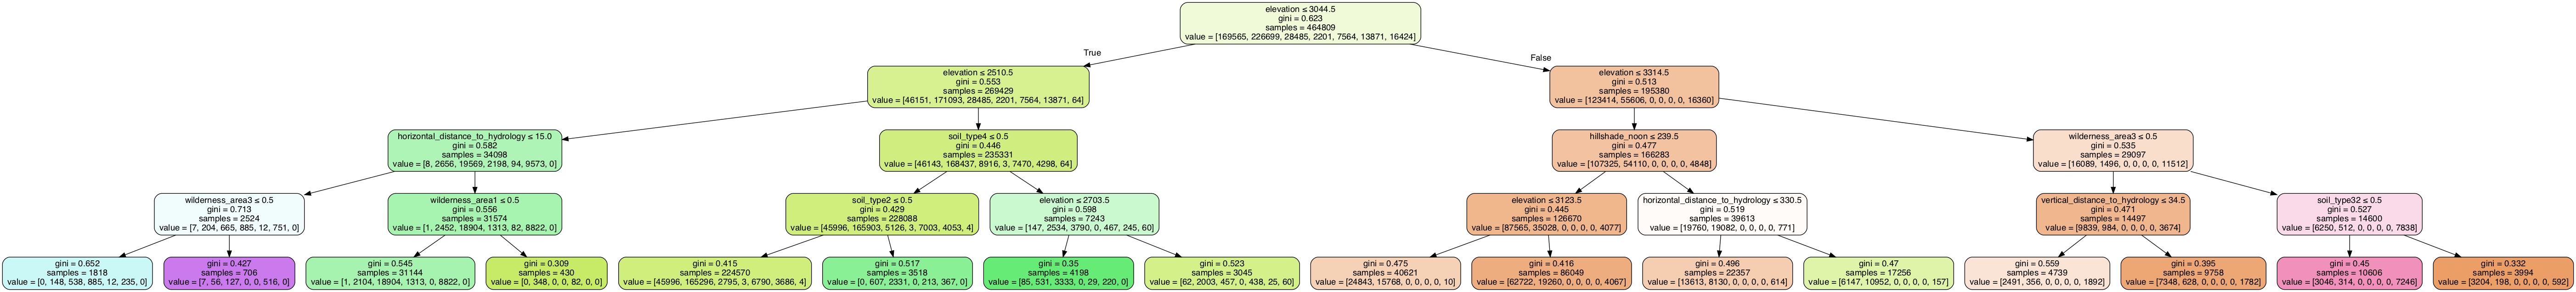

In [9]:
# plot the tree and check the explainability 
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, 
               filled=True, rounded=True, 
               special_characters=True, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("./data/output/forest_cover/version1/forest_dtclassifier_alldefaults.png")
Image(graph.create_png())